Import Packages

In [329]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

Data Analysis

There are 35768 rows of data before pre-processing


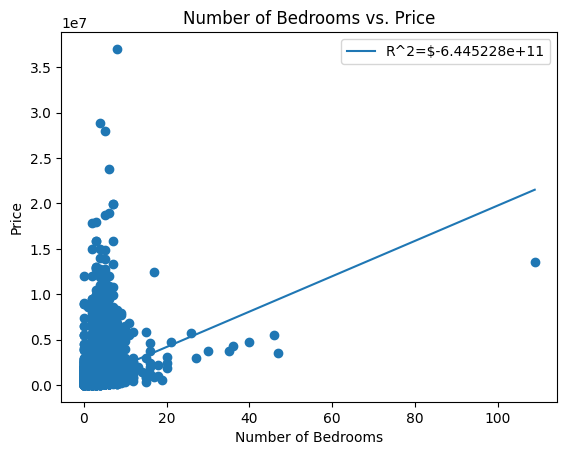

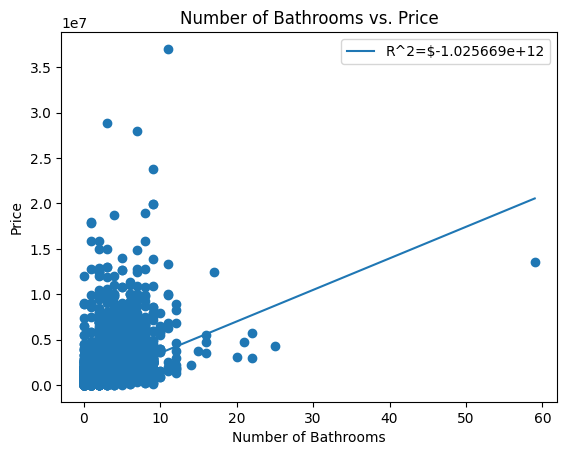

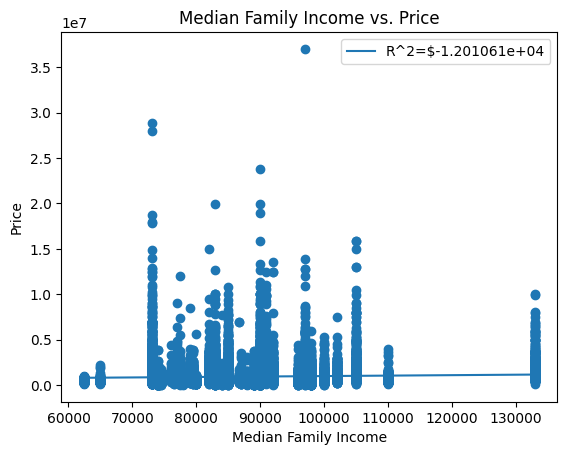

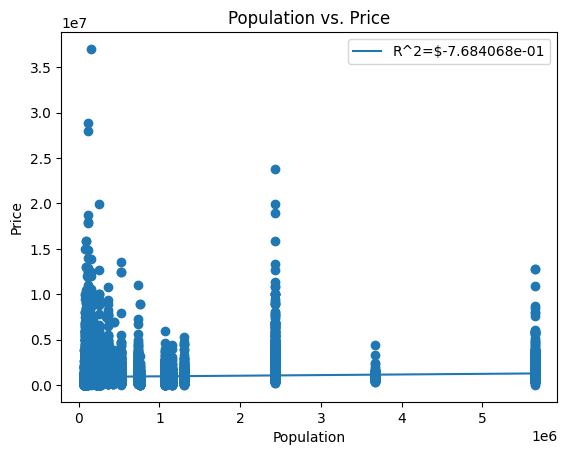

In [330]:
# import data
data = pd.read_csv('HouseData.csv', encoding='latin-1', index_col=False).sample(frac=1)
print(f"There are {data.shape[0]} rows of data before pre-processing")
rSquared = r2_score(data['Number_Beds'], data['Price'])
plt.scatter(data['Number_Beds'], data['Price'])
plt.plot(np.unique(data['Number_Beds']), np.poly1d(np.polyfit(data['Number_Beds'], data['Price'], 1))(np.unique(data['Number_Beds'])), label=f"R^2=${rSquared:e}")
plt.legend()
plt.title("Number of Bedrooms vs. Price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.show()
rSquared = r2_score(data['Number_Baths'], data['Price'])
plt.scatter(data['Number_Baths'], data['Price'])
plt.plot(np.unique(data['Number_Baths']), np.poly1d(np.polyfit(data['Number_Baths'], data['Price'], 1))(np.unique(data['Number_Baths'])), label=f"R^2=${rSquared:e}")
plt.legend()
plt.title("Number of Bathrooms vs. Price")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.show()
rSquared = r2_score(data['Median_Family_Income'], data['Price'])
plt.scatter(data['Median_Family_Income'], data['Price'])
plt.plot(np.unique(data['Median_Family_Income']), np.poly1d(np.polyfit(data['Median_Family_Income'], data['Price'], 1))(np.unique(data['Median_Family_Income'])), label=f"R^2=${rSquared:e}")
plt.legend()
plt.title("Median Family Income vs. Price")
plt.xlabel("Median Family Income")
plt.ylabel("Price")
plt.show()
rSquared = r2_score(data['Population'], data['Price'])
plt.scatter(data['Population'], data['Price'])
plt.plot(np.unique(data['Population']), np.poly1d(np.polyfit(data['Population'], data['Price'], 1))(np.unique(data['Population'])), label=f"R^2=${rSquared:e}")
plt.legend()
plt.title("Population vs. Price")
plt.xlabel("Population")
plt.ylabel("Price")
plt.show()

Data Pre-Processing

In [331]:
# drop rows with missing values
data = data.dropna()

# drop rows with negative numbers indicating an issue
noisyRows = []
for index, d in data.iterrows():
    if (d['Price'] < 0 or d['Number_Beds'] < 0 or d['Number_Baths'] < 0 or d['Population'] < 0 or d['Median_Family_Income'] < 0):
        noisyRows.append(index)
data.drop(noisyRows, axis=0)

# drop rows that are outliers (< Q1 - 1.5*IQR or > Q3 + 1.5*IQR)
percentiles = [25, 50, 75]
percentile_values = np.percentile(data['Price'], percentiles)
iqrPlus50 = 1.5 * (percentile_values[2] - percentile_values[0])
outlierRows = []
for index, d in data.iterrows():
    if (d['Price'] < percentile_values[0] - iqrPlus50 or d['Price'] > percentile_values[2] + iqrPlus50):
        outlierRows.append(index)
data = data.drop(outlierRows, axis=0)

print(f"There are {data.shape[0]} rows of data after pre-processing")

There are 33298 rows of data after pre-processing


Shuffle and Split Data into Training and Test Sets

In [332]:
# shuffle, split into 80% train 20% test
train, test = train_test_split(data, test_size=0.2)
train = train[['Price', 'Number_Beds', 'Number_Baths', 'Population', 'Median_Family_Income']]
test = test[['Price', 'Number_Beds', 'Number_Baths', 'Population', 'Median_Family_Income']]

Linear Regression

In [333]:
# build training and testing sets
trainX = np.c_[train['Number_Beds'], train['Number_Baths'], train['Population'], train['Median_Family_Income'], np.ones(train.shape[0])]
testX = np.c_[test['Number_Beds'], test['Number_Baths'], test['Population'], test['Median_Family_Income'], np.ones(test.shape[0])]
trainY = train['Price'].to_numpy()
testY = test['Price'].to_numpy()

# calculate linear equation
weight = np.dot(np.linalg.inv(np.dot(trainX.transpose(), trainX)), np.dot(trainX.transpose(), trainY))
print('Y = ', weight[4], " + ", weight[3], "* Median_Family_Income + ", weight[2], "* Population + ", weight[1], "* Number_Baths + ", weight[0], "* Number_Beds ")

Y =  48316.10676020069  +  2.123537352819014 * Median_Family_Income +  0.053526555232959516 * Population +  154923.51003026462 * Number_Baths +  33718.85436787164 * Number_Beds 


Evaluate Linear Regression

Training RMSE is:  362874.5501705693
Testing RMSE is:  363827.5649548873
Testing R^2 value is:  -1.7637285770810016


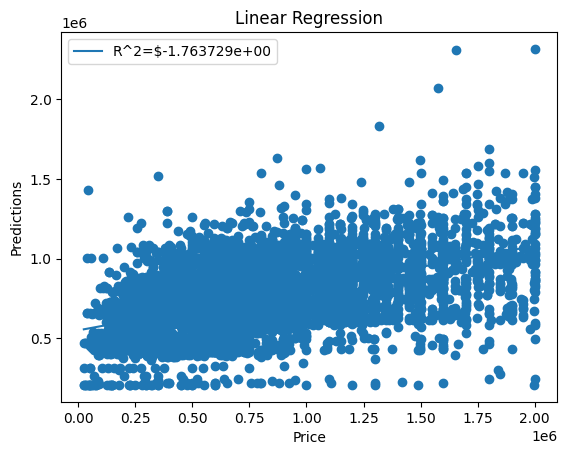

In [334]:
# Measure efficacy of Linear Regression Model
trainPredictions = np.dot(trainX, weight)
trainError = math.sqrt(np.mean((trainY - trainPredictions)**2))
print("Training RMSE is: ", trainError)
testPredictions = np.dot(testX, weight)
testError = math.sqrt(np.mean((testY - testPredictions)**2))
print("Testing RMSE is: ", testError)
r2 = r2_score(testPredictions, testY)
print("Testing R^2 value is: ", r2)
plt.scatter(testY, testPredictions)
plt.plot(np.unique(testY), np.poly1d(np.polyfit(testY, testPredictions, 1))(np.unique(testY)), label=f"R^2=${r2:e}")
plt.xlabel("Price")
plt.ylabel("Predictions")
plt.title("Linear Regression")
plt.legend()
plt.show()

Polynomial Regression

In [335]:
# build training and testing sets
trainX = np.c_[train['Number_Beds'], train['Number_Beds']**2, train['Number_Baths'], train['Number_Baths']**2, train['Population'], train['Median_Family_Income'], np.ones(train.shape[0])]
testX = np.c_[test['Number_Beds'], test['Number_Beds']**2, test['Number_Baths'], test['Number_Baths']**2, test['Population'], test['Median_Family_Income'], np.ones(test.shape[0])]

# calculate linear equation
weight = np.dot(np.linalg.inv(np.dot(trainX.transpose(), trainX)), np.dot(trainX.transpose(), trainY))
print('Y = ', weight[6], " + " , weight[5] , "*Median_Family_Income + ", weight[4], "* Population + ", weight[3], "* Number_Baths^2 + ", weight[2], "* Number_Baths + ", weight[1], "* Number_Beds^2 + ", weight[0], "* Number_Beds ")

Y =  49796.90966085438  +  2.128325447945528 *Median_Family_Income +  0.05355400245128017 * Population +  1530.8942452155752 * Number_Baths^2 +  145612.91541590448 * Number_Baths +  -672.6460485228163 * Number_Beds^2 +  39338.42258271109 * Number_Beds 


Evaluate Polynomial Regression

Training RMSE is:  362859.8916732205
Testing RMSE is:  363768.23231155594
Testing R^2 value is:  -1.7623630246234647


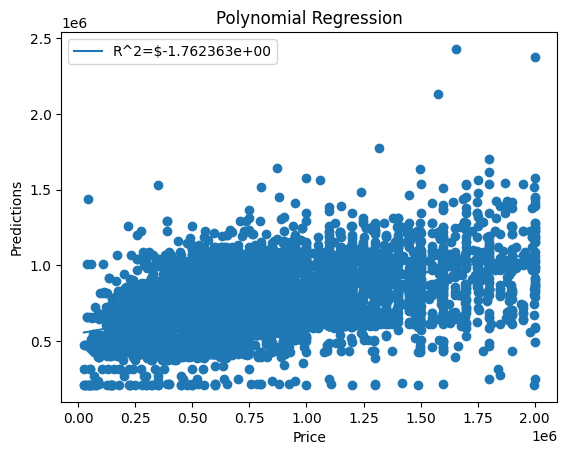

In [336]:
# Measure efficacy of Polynomial Regression Model
trainPredictions = np.dot(trainX, weight)
trainError = math.sqrt(np.mean((trainY - trainPredictions)**2))
print("Training RMSE is: ", trainError)
testPredictions = np.dot(testX, weight)
testError = math.sqrt(np.mean((testY - testPredictions)**2))
print("Testing RMSE is: ", testError)
r2 = r2_score(testPredictions, testY)
print("Testing R^2 value is: ", r2)
plt.scatter(testY, testPredictions)
plt.plot(np.unique(testY), np.poly1d(np.polyfit(testY, testPredictions, 1))(np.unique(testY)), label=f"R^2=${r2:e}")
plt.xlabel("Price")
plt.ylabel("Predictions")
plt.title("Polynomial Regression")
plt.legend()
plt.show()

Set Up Data for Neural Network

In [337]:
# remove constant
trainX = np.c_[train['Number_Beds'], train['Number_Baths'], train['Population'], train['Median_Family_Income']]
testX = np.c_[test['Number_Beds'], test['Number_Baths'], test['Population'], test['Median_Family_Income']]

Neural Network

In [338]:
# build neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")
model.fit(trainX, trainY, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 343459659776.0000
Epoch 2/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 179015516160.0000
Epoch 3/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 175318745088.0000
Epoch 4/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 171987435520.0000
Epoch 5/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 172037390336.0000
Epoch 6/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 172627869696.0000
Epoch 7/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 172218187776.0000
Epoch 8/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 172533825536.0000
Epoch 9/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 174068269056.0000
Epoch 10/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 172233097216.0000


Evaluate Neural Network

833/833 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step
Training RMSE is:  441267.6914051494
Testing RMSE is:  363768.23231155594
Testing R^2 value is:  -9.980112382683375


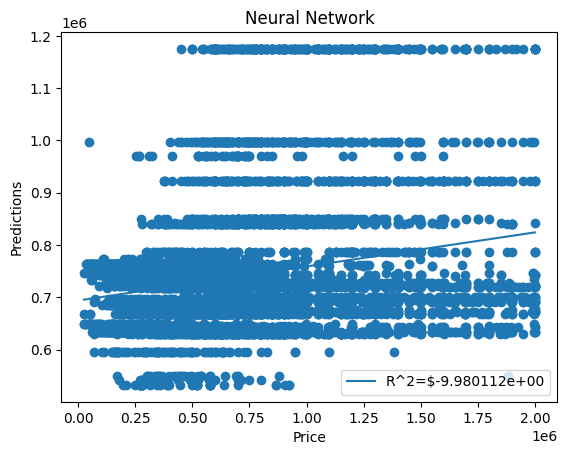

In [339]:
# Measure efficacy of Neural Network
trainResults = model.predict(trainX)
testResults = model.predict(testX)
trainError = math.sqrt(np.mean((trainY - trainResults)**2))
print("Training RMSE is: ", trainError)
trainError = math.sqrt(np.mean((testY - testResults)**2))
print("Testing RMSE is: ", testError)
r2 = r2_score(testResults, testY)
print("Testing R^2 value is: ", r2)
testPredictions = []
for i in testResults:
    testPredictions.append(i[0])
plt.scatter(testY, testResults)
plt.plot(np.unique(testY), np.poly1d(np.polyfit(testY, testPredictions, 1))(np.unique(testY)), label=f"R^2=${r2:e}")
plt.xlabel("Price")
plt.ylabel("Predictions")
plt.title("Neural Network")
plt.legend()
plt.show()